In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


In [2]:
# Load the data
data = pd.read_csv("Salary_Data.csv")
print(data.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [3]:
# Check the shape of the data
print(data.shape)

(30, 2)


In [4]:
# Data Preprocessing
# Check the datatype
print(data.dtypes)


YearsExperience    float64
Salary             float64
dtype: object


In [5]:

# Check for null values
print(data.isna().sum())

YearsExperience    0
Salary             0
dtype: int64


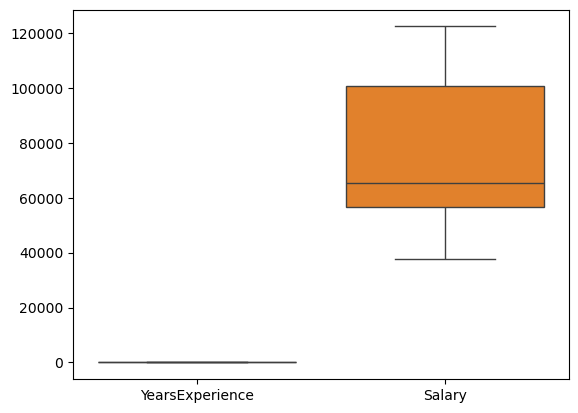

In [6]:
# Check for outliers
sns.boxplot(data[["YearsExperience", "Salary"]])
plt.show()

In [7]:
# Descriptive statistics
print(data.describe())


       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


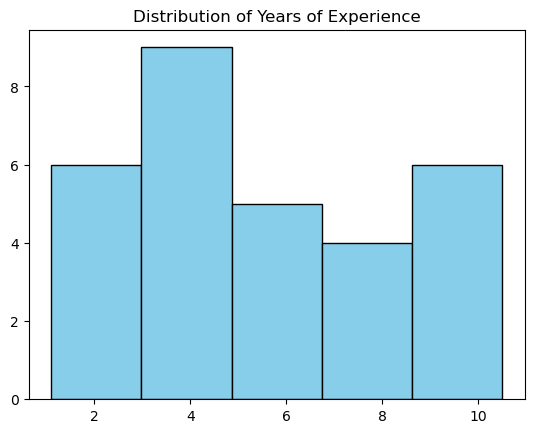

In [8]:
# Univariate Analysis
plt.hist(data['YearsExperience'], bins=5, color='skyblue', edgecolor='black')
plt.title("Distribution of Years of Experience")
plt.show()

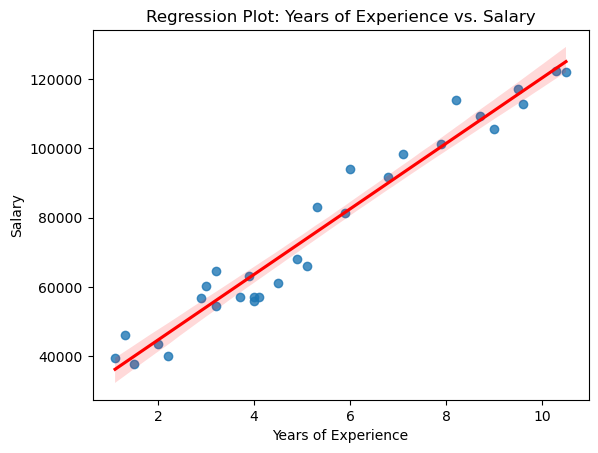

In [9]:
# Bivariate Analysis
# Scatter plot with regression line
sns.regplot(x=data['YearsExperience'], y=data['Salary'], line_kws={"color": "red"})
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Regression Plot: Years of Experience vs. Salary")
plt.show()

In [10]:
# Model Building
# Simple Linear Regression model
X = data[['YearsExperience']]
y = data['Salary']


In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Initialize the model
model = LinearRegression()

In [13]:
# Fit the model
model.fit(X_train, y_train)


LinearRegression()

In [14]:
# Make predictions
y_pred = model.predict(X_test)


In [15]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Simple Linear Regression - RMSE: {rmse}, R-Squared: {r2}')


Simple Linear Regression - RMSE: 7059.04362190151, R-Squared: 0.9024461774180497


In [16]:
# Apply different transformations and calculate RMSE and correlation coefficient for each model

# Log Transformation
X_log = np.log(X)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y, test_size=0.2, random_state=42)
model_log = LinearRegression()
model_log.fit(X_train_log, y_train_log)
y_pred_log = model_log.predict(X_test_log)

rmse_log = np.sqrt(mean_squared_error(y_test_log, y_pred_log))
r2_log = r2_score(y_test_log, y_pred_log)
print(f'Log Transformation - RMSE: {rmse_log}, R-Squared: {r2_log}')


Log Transformation - RMSE: 9196.064796874722, R-Squared: 0.8344395471211846


In [17]:
# Polynomial Transformation
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)
y_pred_poly = model_poly.predict(X_test_poly)

rmse_poly = np.sqrt(mean_squared_error(y_test_poly, y_pred_poly))
r2_poly = r2_score(y_test_poly, y_pred_poly)
print(f'Polynomial Transformation - RMSE: {rmse_poly}, R-Squared: {r2_poly}')


Polynomial Transformation - RMSE: 7247.6145295383185, R-Squared: 0.8971645780890871


In [18]:
# Choose the best fit model
best_model = min([(rmse, r2, 'Simple Linear Regression'), (rmse_log, r2_log, 'Log Transformation'), (rmse_poly, r2_poly, 'Polynomial Transformation')])

print(f'Best Model: {best_model[2]} with RMSE: {best_model[0]} and R-Squared: {best_model[1]}')

Best Model: Simple Linear Regression with RMSE: 7059.04362190151 and R-Squared: 0.9024461774180497
